In [2]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = "svg"
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
df = pd.read_csv(f"{path}/train.csv")

In [4]:
print("Shape of data:", df.shape)

Shape of data: (103904, 25)


In [5]:
print("Columns of dataset:\n", df.columns)

Columns of dataset:
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [6]:
print("Target names:", set(df["satisfaction"]))

Target names: {'neutral or dissatisfied', 'satisfied'}


# Inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [9]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

# Missing Values

In [10]:
df.dropna(inplace=True)
print("Shape of data:", df.shape)

Shape of data: (103594, 23)


# Encoding

In [11]:
df.select_dtypes(include=["object"]).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [12]:
print("Gender:", set(df["Gender"]))
print("Customer Type:", set(df["Customer Type"]))
print("Type of Travel:", set(df["Type of Travel"]))
print("Class:", set(df["Class"]))
print("satisfaction:", set(df["satisfaction"]))

Gender: {'Female', 'Male'}
Customer Type: {'Loyal Customer', 'disloyal Customer'}
Type of Travel: {'Business travel', 'Personal Travel'}
Class: {'Eco Plus', 'Eco', 'Business'}
satisfaction: {'neutral or dissatisfied', 'satisfied'}


In [13]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Customer Type"] = le.fit_transform(df["Customer Type"])
df["Type of Travel"] = le.fit_transform(df["Type of Travel"])
df["satisfaction"] = le.fit_transform(df["satisfaction"])

In [14]:
ohe = OneHotEncoder(sparse_output=False)
class_encoded = ohe.fit_transform(df[["Class"]])
feature_names = ohe.get_feature_names_out(["Class"])
class_df = pd.DataFrame(class_encoded, columns=feature_names, index=df.index)
new_feature_names = ["Business", "Eco", "Eco Plus"]
class_df.columns = new_feature_names
df = pd.concat([df.drop('Class', axis=1), class_df], axis=1)

# Feature Scaling

In [15]:
scaler = StandardScaler()
cols_to_scale = ["Age",
                 "Flight Distance",
                 "Departure Delay in Minutes",
                 "Arrival Delay in Minutes"]

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Review

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  float64
 3   Type of Travel                     103594 non-null  int64  
 4   Flight Distance                    103594 non-null  float64
 5   Inflight wifi service              103594 non-null  int64  
 6   Departure/Arrival time convenient  103594 non-null  int64  
 7   Ease of Online booking             103594 non-null  int64  
 8   Gate location                      103594 non-null  int64  
 9   Food and drink                     103594 non-null  int64  
 10  Online boarding                    103594 non-null  int64  
 11  Seat comfort                       103594 no

In [17]:
df.head(10)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,0,-1.745542,1,-0.731305,3,4,3,1,5,...,4,4,5,5,0.268966,0.072905,0,0.0,0.0,1.0
1,1,1,-0.951526,0,-0.956916,3,2,3,3,1,...,3,1,4,1,-0.360682,-0.237184,0,1.0,0.0,0.0
2,0,0,-0.885358,0,-0.047454,2,2,2,2,5,...,4,4,4,5,-0.386917,-0.392229,1,1.0,0.0,0.0
3,0,0,-0.951526,0,-0.629028,2,5,5,5,2,...,3,1,4,2,-0.098328,-0.159662,0,1.0,0.0,0.0
4,1,0,1.430521,0,-0.977973,3,3,3,3,4,...,4,3,3,3,-0.386917,-0.392229,1,1.0,0.0,0.0
5,0,0,-0.885358,1,-0.009351,3,4,2,1,1,...,4,4,4,1,-0.386917,-0.392229,0,0.0,1.0,0.0
6,1,0,0.504169,1,0.086910,2,4,2,3,2,...,4,3,5,2,-0.150799,0.202109,0,0.0,1.0,0.0
7,0,0,0.835009,0,0.847971,4,3,4,4,5,...,5,4,5,4,-0.281976,-0.392229,1,1.0,0.0,0.0
8,0,0,0.107161,0,-0.337238,1,2,2,2,4,...,1,4,1,2,-0.386917,-0.392229,0,1.0,0.0,0.0
9,1,1,-1.282366,0,-0.128674,3,3,3,4,2,...,4,4,3,2,-0.386917,-0.392229,0,0.0,1.0,0.0


# Visualization

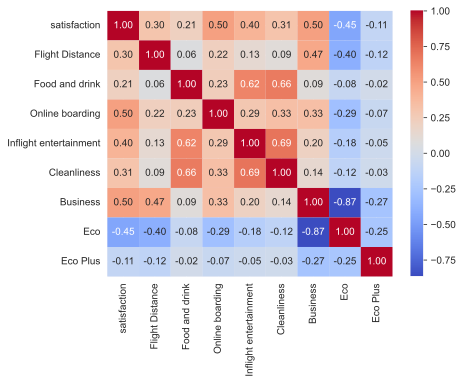

In [18]:
features_of_interest = ["satisfaction", "Flight Distance", "Food and drink",
                        "Online boarding", "Inflight entertainment",
                        "Cleanliness", "Business", "Eco", "Eco Plus"]

corr_df = df[features_of_interest].corr()
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

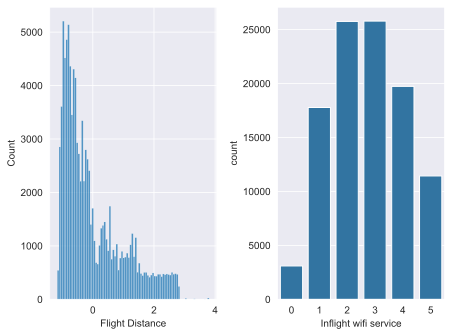

In [19]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data=df, x="Flight Distance", ax=axes[0])
sns.countplot(data=df, x="Inflight wifi service", ax=axes[1])
plt.tight_layout()
plt.show()

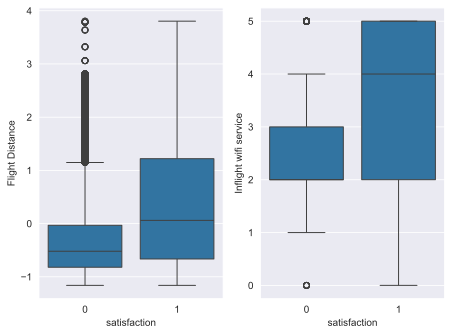

In [20]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df, x="satisfaction", y="Flight Distance", ax=axes[0])
sns.boxplot(data=df, x="satisfaction", y="Inflight wifi service", ax=axes[1])
plt.tight_layout()
plt.show()

# Training and Testing Data

In [21]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k-NN

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
round(knn.score(X_test, y_test), 2)

0.91

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
round(knn.score(X_test, y_test), 2)

0.93

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
round(knn.score(X_test, y_test), 2)

0.93

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14658
           1       0.94      0.89      0.92     11241

    accuracy                           0.93     25899
   macro avg       0.93      0.92      0.93     25899
weighted avg       0.93      0.93      0.93     25899



In [26]:
confusion_matrix(y_test, y_pred)

array([[14004,   654],
       [ 1187, 10054]])

# Decision Tree

In [27]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
round(tree.score(X_test, y_test), 2)

0.94

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14658
           1       0.94      0.94      0.94     11241

    accuracy                           0.94     25899
   macro avg       0.94      0.94      0.94     25899
weighted avg       0.94      0.94      0.94     25899



In [29]:
confusion_matrix(y_test, y_pred)

array([[13941,   717],
       [  722, 10519]])

# SVM

In [30]:
svc = SVC(kernel="rbf", random_state=0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
round(svc.score(X_test, y_test), 2)

0.94

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14658
           1       0.94      0.92      0.93     11241

    accuracy                           0.94     25899
   macro avg       0.94      0.94      0.94     25899
weighted avg       0.94      0.94      0.94     25899



In [32]:
confusion_matrix(y_test, y_pred)

array([[14054,   604],
       [  877, 10364]])

In [33]:
lsvc = LinearSVC(max_iter=1000, random_state=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
round(lsvc.score(X_test, y_test), 2)

0.87

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14658
           1       0.87      0.83      0.85     11241

    accuracy                           0.87     25899
   macro avg       0.87      0.87      0.87     25899
weighted avg       0.87      0.87      0.87     25899



In [35]:
confusion_matrix(y_test, y_pred)

array([[13264,  1394],
       [ 1902,  9339]])

In [36]:
param_grid = {"C": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(estimator=lsvc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(round(grid_search.best_score_, 2))

{'C': 10.0}
0.87


# Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
round(rf.score(X_test, y_test), 2)

0.96

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14658
           1       0.97      0.94      0.95     11241

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899



In [39]:
confusion_matrix(y_test, y_pred)

array([[14320,   338],
       [  675, 10566]])

# AdaBoost

In [40]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
round(ada.score(X_test, y_test), 2)

0.92

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14658
           1       0.92      0.91      0.91     11241

    accuracy                           0.92     25899
   macro avg       0.92      0.92      0.92     25899
weighted avg       0.92      0.92      0.92     25899



In [42]:
confusion_matrix(y_test, y_pred)

array([[13729,   929],
       [ 1051, 10190]])